In [2]:
import requests
import pandas as pd
from pprint import pprint
import re

movies = ["tt0381061", "tt0482571", "tt1232829", "tt1853728", "tt0993846", "tt0314331", "tt0362227", "tt0446029", "tt1631867","tt0841032",
"tt0266543",
"tt0371746",
"tt1219827",
"tt0317919",
"tt0373889",
"tt0488120",
"tt0414993",
"tt0325980",
"tt0367882",
"tt0337978",
"tt0371746",
"tt0482571",
"tt0417741",
"tt0253474",
"tt0362227",
"tt0480249",
"tt0328107",
"tt0383574",
"tt0414055",
"tt0458481",
"tt0338013",
"tt0286716",
"tt0253474",
"tt0362227",
"tt0417741",
"tt0371746",
"tt0482571",
"tt0327056",
"tt0266543",
"tt0465234",
"tt0246578",
"tt0372784",
"tt0496806",
"tt0325980",
"tt0264464",
"tt0405422",
"tt0480249",
"tt0414852",
"tt0330373",
"tt0365748",
"tt0363163",
"tt0417741",
"tt0332452",
"tt0278504",
"tt0480249",
"tt0372183",
"tt0289879",
"tt0422295",
"tt0382932",
"tt0449088",
"tt0371746",
"tt0405422",
"tt1210819",
"tt0780653",
"tt0413300",
"tt0816692",
"tt0329691",
"tt0417741",
"tt0482571",
"tt0338013",
"tt0325980",
"tt0413300",
"tt0482571",
"tt0371246",
"tt0245429",
"tt0363163",
"tt0330373",
"tt0399295",
"tt0467406",
"tt0425210",
"tt0371746",
"tt1232829",
"tt0399295",
"tt0489099",
"tt0362227",
"tt0328107",
"tt0405422",
"tt0299930",
"tt0417741",
"tt0275847",
"tt0330373",
"tt0241527",
"tt0379786",
"tt0480249",
"tt0289879",
"tt0362227",
"tt0411008",
"tt0397313",
"tt0295297",
"tt0275847",
"tt0347149",
"tt0477348",
"tt0259711",
"tt0405508",
"tt0371746",
"tt0286716",
"tt0486655",
"tt0362227",
"tt0328107",
"tt0249462",
"tt0245429",
"tt0371746",
"tt0289879",
"tt0322259",
"tt0259711",
"tt0290334",
"tt0333766",
"tt0265086",
"tt0388795",
"tt0362227",
"tt0245429",
"tt0482571",
"tt0362165",
"tt0298148",
"tt0414993",
"tt0381707",
"tt0373889",
"tt0328107",
"tt0478087",
"tt0448124",
"tt0266543",
"tt0371746",
"tt0405422",
"tt0482571",
"tt0848228",
"tt1232829",
"tt1528100",
"tt1895587",
"tt2076822",
"tt2278388",
"tt0266543",
"tt0361862",
"tt0405159",
"tt0482571",
"tt0498399",
"tt0770828",
"tt0905372",
"tt1170358",
"tt1216475",
"tt1838556",
"tt0289879",
"tt0499448",
"tt0325710",
"tt0413267",
"tt0362478",
"tt0482571",
"tt0332452",
"tt0448124",
"tt0401855",
"tt0373889",
"tt0313542",
"tt0277296",
"tt0259324",
"tt0372784",
"tt0382932",
"tt0246578",
"tt0405422",
"tt0338013",
"tt0246578",
"tt0322259",
"tt0338013",
"tt0299977",
"tt0413300",
"tt0482571",
"tt0363771",
"tt0383574",
"tt0258463",
"tt0327056",
"tt0371746",
"tt0429589",
"tt0371746",
"tt0246578",
"tt1219289",
"tt0383574",
"tt0405422",
"tt0413300",
"tt0314331",
"tt0480249",
"tt0417741",
"tt0264464",
"tt0278504",
"tt0482571",
"tt0371746",
"tt0332452",
"tt0241527",
"tt0372784",
"tt0362227",
"tt0405508",
"tt0448134",
"tt0462396"]
movie_data = []

url = "https://movie-database-alternative.p.rapidapi.com/"

headers = {
    "X-RapidAPI-Key": "a4c36db604mshfaaecf2d62e6204p1a358bjsnc66f026fcfe4",
    "X-RapidAPI-Host": "movie-database-alternative.p.rapidapi.com"
}

for movie in movies:
    querystring = {"r":"json","i":movie}

    try:
        response = requests.get(url, headers=headers, params=querystring).json()
    
        title = response['Title']
        year = response['Year']
        awards_rough = response['Awards']
        ratings_rough = response['Ratings']

        box_office = response['BoxOffice']
        box_office = box_office.replace("$", "")
        box_office = box_office.replace(",", "")
        box_office = float(box_office)

        runtime = response['Runtime']
        temp = runtime.split(" min")
        runtime = int(temp[0])

        imdb = ratings_rough[0]['Value']
        temp = imdb.split("/")
        imdb = int(float(temp[0]) * 10)

        rotten_tomatoes = ratings_rough[1]['Value']
        temp = rotten_tomatoes.split("%")
        rotten_tomatoes = int(temp[0])

        metacritic = ratings_rough[2]['Value']
        temp = metacritic.split("/")
        metacritic = int(temp[0])
    
        nums = re.findall(r'\d+', awards_rough)
        noms = int(nums[len(nums)-1])
        if len(nums) > 1:
            wins = int(nums[len(nums)-2])
        else:
            wins = 0

        movie_data.append({"Title": title,
                        "Year": year,
                        "Runtime": runtime,
                        "Box Office": box_office,
                        "IMDb": imdb,
                        "Rotten Tomatoes": rotten_tomatoes,
                        "Metacritic": metacritic,
                        "Nominations": noms,
                        "Wins": wins,})
    except:
        print("Movie not found. Skipping...")
        pass
    
movie_data_df = pd.DataFrame(movie_data)
movie_data_df.head()

Movie not found. Skipping...
Movie not found. Skipping...
Movie not found. Skipping...
Movie not found. Skipping...
Movie not found. Skipping...
Movie not found. Skipping...


,Title,Year,Runtime,Box Office,IMDb,Rotten Tomatoes,Metacritic,Nominations,Wins
0,Casino Royale,2006,144,167445960.0,80,94,80,44,28
1,The Prestige,2006,130,53089891.0,85,76,66,45,6
2,21 Jump Street,2012,109,138447667.0,72,85,69,21,11
3,Django Unchained,2012,165,162805434.0,84,87,81,158,58
4,The Wolf of Wall Street,2013,180,116900694.0,82,80,75,179,37


In [3]:
average_runtime = movie_data_df["Runtime"].mean()
average_boxoffice = movie_data_df["Box Office"].mean()
average_wins = movie_data_df["Wins"].mean()
average_nominations = movie_data_df["Nominations"].mean()
average_Rotten_tomatoes_score = movie_data_df["Rotten Tomatoes"].mean()
average_Metacritic = movie_data_df["Metacritic"].mean()
average_IMDb = movie_data_df["IMDb"].mean()
total_movies = movie_data_df["Title"].nunique()

In [4]:
summary_movie_data = pd.DataFrame({"Total Number of Movies":total_movies,
                       "Average Runtime":average_runtime,
                       "Average Box Office": average_boxoffice, 
                       "Average Wins":average_wins,
                       "Average Nominations":average_nominations,
                       "Average Rotten Tomatoes Score":average_Rotten_tomatoes_score,
                        "Average Metacritic Scores":average_Metacritic,
                        "Average IMDb Scores": average_IMDb}, index=[1])
summary_movie_data

,Total Number of Movies,Average Runtime,Average Box Office,Average Wins,Average Nominations,Average Rotten Tomatoes Score,Average Metacritic Scores,Average IMDb Scores
1,104,125.221649,1.436169e+08,18.350515,40.180412,70.541237,65.634021,73.814433


In [25]:
import random
import matplotlib.pyplot as plt
import numpy as np

box_office_bins = [0, 50000000, 100000000,  150000000, 200000000, 250000000, 300000000,350000000, 400000000, 450000000, 500000000]
box_office_labels = ["0 to 50", "50-100", "100-150", "150-200", "200-250",
                "250-300","300-350", "350-400", "400-450","450-500"]

In [26]:

movie_data_df['Box Office Groupings (millions)'] = pd.cut(movie_data_df['Box Office'],bins=box_office_bins, labels=box_office_labels)
movie_data_df.head()

,Title,Year,Runtime,Box Office,IMDb,Rotten Tomatoes,Metacritic,Nominations,Wins,Box Office Groupings (millions)
0,Casino Royale,2006,144,167445960.0,80,94,80,44,28,150-200
1,The Prestige,2006,130,53089891.0,85,76,66,45,6,50-100
2,21 Jump Street,2012,109,138447667.0,72,85,69,21,11,100-150
3,Django Unchained,2012,165,162805434.0,84,87,81,158,58,150-200
4,The Wolf of Wall Street,2013,180,116900694.0,82,80,75,179,37,100-150


/var/folders/gq/_bnzzltj6nq473mjgz2klg1h0000gn/T/ipykernel_36813/2497380678.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = movie_data_df.groupby('Box Office Groupings (millions)').sum()['Wins']


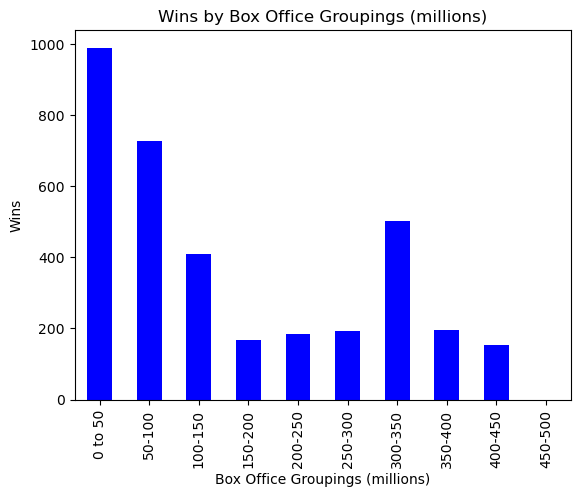

In [34]:
# x = movie_data_df["Box Office"]
#y = movie_data_df["Wins"]

#plt.bar(x, y, color="b", align="center")

# Group by 'Box Office Groupings (millions)' and sum the 'Wins'
grouped_data = movie_data_df.groupby('Box Office Groupings (millions)').sum()['Wins']

# Plot the aggregated data
grouped_data.plot(kind='bar', color='b', align='center')
plt.ylabel('Wins')
plt.title('Wins by Box Office Groupings (millions)')
plt.show()

In [40]:
# Group by 'Box Office Groupings (millions)' and sum the 'Wins'
grouped_data

TypeError: 'int' object is not callable

In [27]:
movie_data_df.dtypes

Title                                object
Year                                 object
Runtime                               int64
Box Office                          float64
IMDb                                  int64
Rotten Tomatoes                       int64
Metacritic                            int64
Nominations                           int64
Wins                                  int64
Box Office Groupings (millions)    category
dtype: object

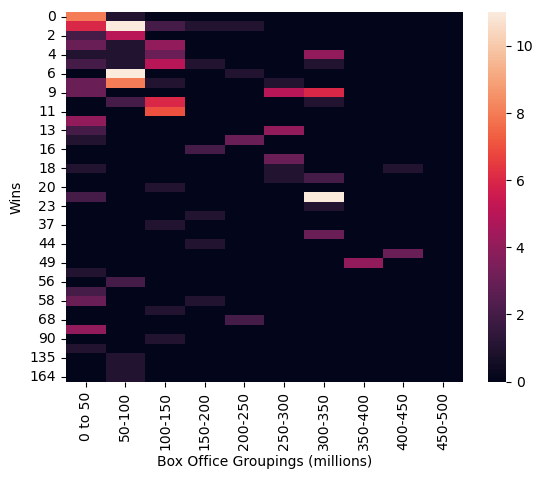

In [43]:
import seaborn as sn 

hm = sn.heatmap(movie_data_df.groupby(['Box Office Groupings (millions)','Wins'])
                .size()
                .unstack(level=0))
